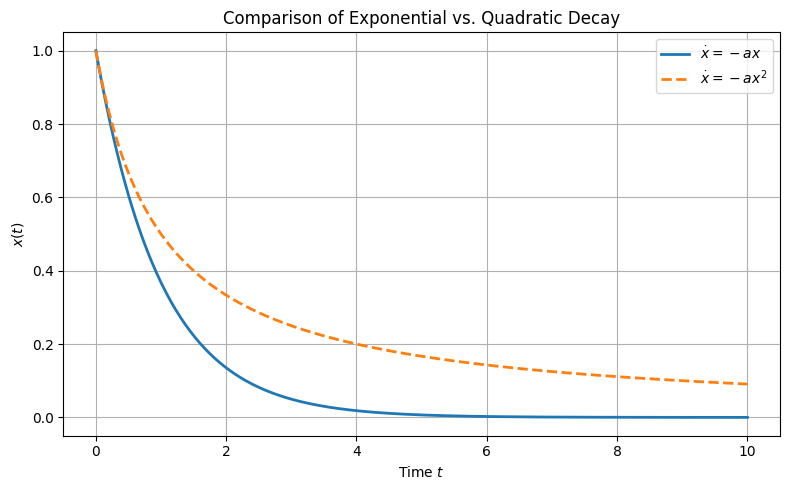

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time range
t = np.linspace(0, 10, 400)

# Initial condition and parameter
x0 = 1
a = 1

# Solutions
x_exp = x0 * np.exp(-a * t)               # Exponential decay: dx/dt = -a x
x_quad = x0 / (1 + a * x0 * t)            # Quadratic decay: dx/dt = -a x^2

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(t, x_exp, label=r'$\dot{x} = -a x$', linewidth=2)
plt.plot(t, x_quad, label=r'$\dot{x} = -a x^2$', linewidth=2, linestyle='--')
plt.xlabel('Time $t$')
plt.ylabel('$x(t)$')
plt.title('Comparison of Exponential vs. Quadratic Decay')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

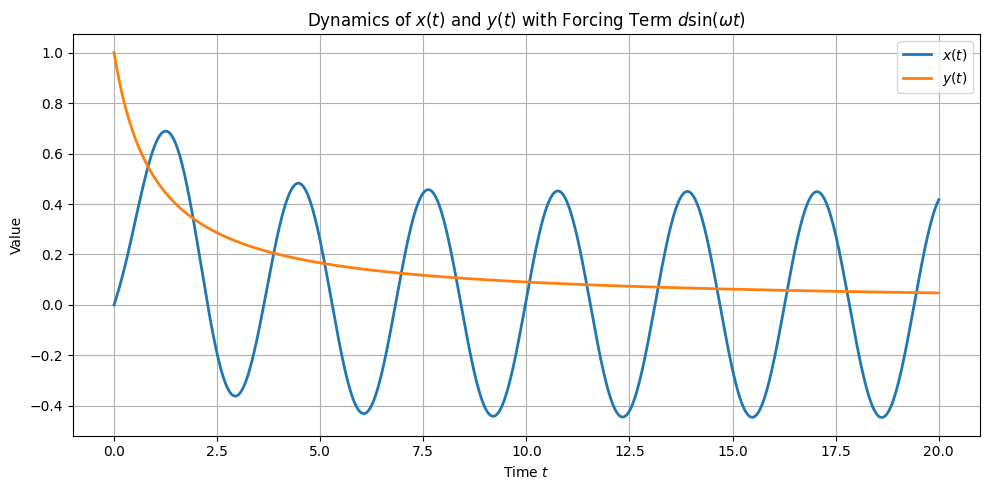

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
a = 1.0
c = 1.0
d = 1.0
omega = 2.0

# Time span
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Initial conditions: x(0), y(0)
x0 = 0.0
y0 = 1.0

# System of equations
def system(t, z):
    x, y = z
    dxdt = (c / 2) * y**2 - a * x + d * np.sin(omega * t)
    dydt = -c * y**2
    return [dxdt, dydt]

# Solve ODE
sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)

# Plotting
plt.figure(figsize=(10, 5))

plt.plot(sol.t, sol.y[0], label=r'$x(t)$', color='tab:blue', linewidth=2)
plt.plot(sol.t, sol.y[1], label=r'$y(t)$', color='tab:orange', linewidth=2)

plt.title('Dynamics of $x(t)$ and $y(t)$ with Forcing Term $d \sin(\omega t)$')
plt.xlabel('Time $t$')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

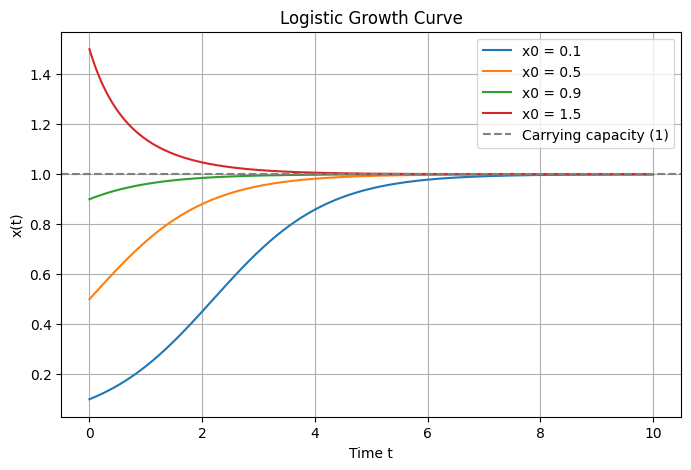

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
t = np.linspace(0, 10, 400)

# Logistic function definition
def logistic(t, x0):
    return 1 / (1 + ((1 / x0) - 1) * np.exp(-t))

# Initial values to try
initial_conditions = [0.1, 0.5, 0.9, 1.5]

plt.figure(figsize=(8, 5))
for x0 in initial_conditions:
    plt.plot(t, logistic(t, x0), label=f'x0 = {x0}')

plt.axhline(1, color='gray', linestyle='--', label='Carrying capacity (1)')
plt.title('Logistic Growth Curve')
plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

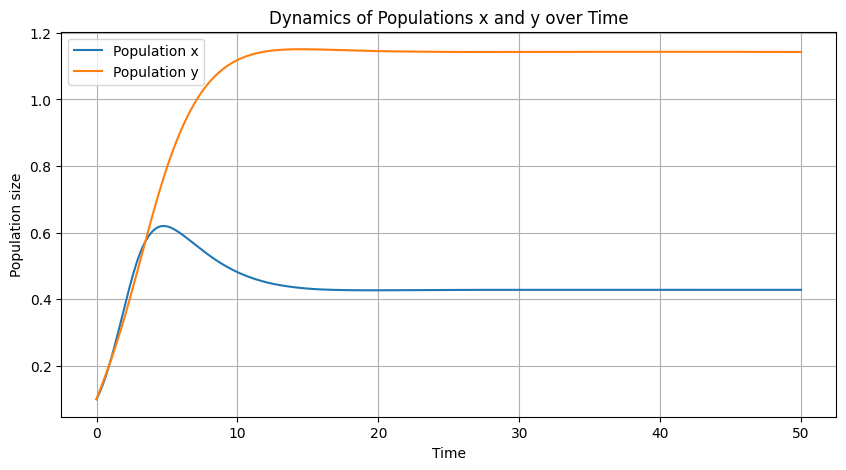

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
b = 0.5    # Strength of y's effect on x (removal rate)
c = 0.1    # Baseline growth/input of y
a = 0.3    # How much x stimulates y
decay_y = 0.2  # Decay rate of y

# Time span and evaluation points
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# System of ODEs
def system(t, z):
    x, y = z
    dxdt = x*(1 - x) - b*x*y
    dydt = c + a*x - decay_y*y
    return [dxdt, dydt]

# Initial populations
x0 = 0.1
y0 = 0.1

# Solve ODE
sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(sol.t, sol.y[0], label='Population x')
plt.plot(sol.t, sol.y[1], label='Population y')
plt.title('Dynamics of Populations x and y over Time')
plt.xlabel('Time')
plt.ylabel('Population size')
plt.legend()
plt.grid(True)
plt.show()

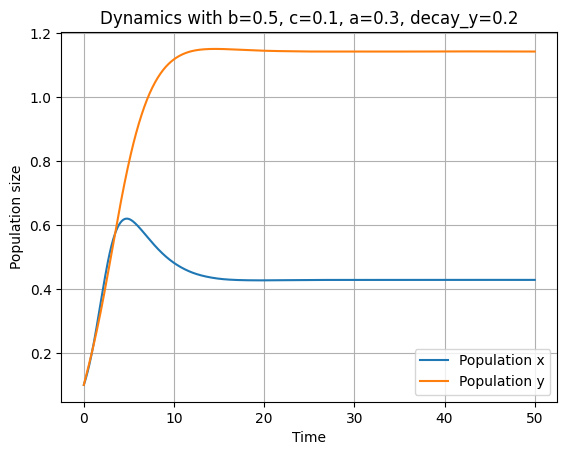

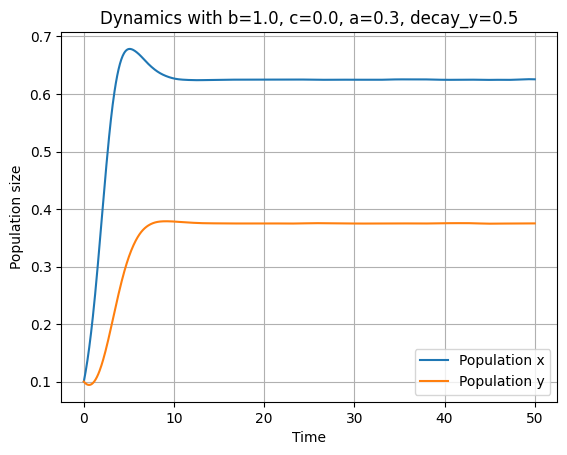

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def plot_system(b, c, a, decay_y, x0=0.1, y0=0.1, t_end=50):
    t_span = (0, t_end)
    t_eval = np.linspace(*t_span, 1000)

    def system(t, z):
        x, y = z
        dxdt = x*(1 - x) - b*x*y
        dydt = c + a*x - decay_y*y
        return [dxdt, dydt]

    sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)

    plt.plot(sol.t, sol.y[0], label='Population x')
    plt.plot(sol.t, sol.y[1], label='Population y')
    plt.title(f'Dynamics with b={b}, c={c}, a={a}, decay_y={decay_y}')
    plt.xlabel('Time')
    plt.ylabel('Population size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Scenario 1: Moderate immune effect, steady baseline y
plot_system(b=0.5, c=0.1, a=0.3, decay_y=0.2)

# Scenario 2: Stronger immune effect, no baseline y
plot_system(b=1.0, c=0.0, a=0.3, decay_y=0.5)

C:\Users\mutua\AppData\Local\Temp\ipykernel_19012\3154497048.py:25: UserWarning: The following kwargs were not used by contour: 'label'
  contour_dx = plt.contour(X, Y, nullcline_x, levels=[0], colors='blue', linewidths=2, label='dx=0 nullcline')
C:\Users\mutua\AppData\Local\Temp\ipykernel_19012\3154497048.py:27: UserWarning: The following kwargs were not used by contour: 'label'
  contour_dy = plt.contour(X, Y, nullcline_y, levels=[0], colors='red', linewidths=2, label='dy=0 nullcline')


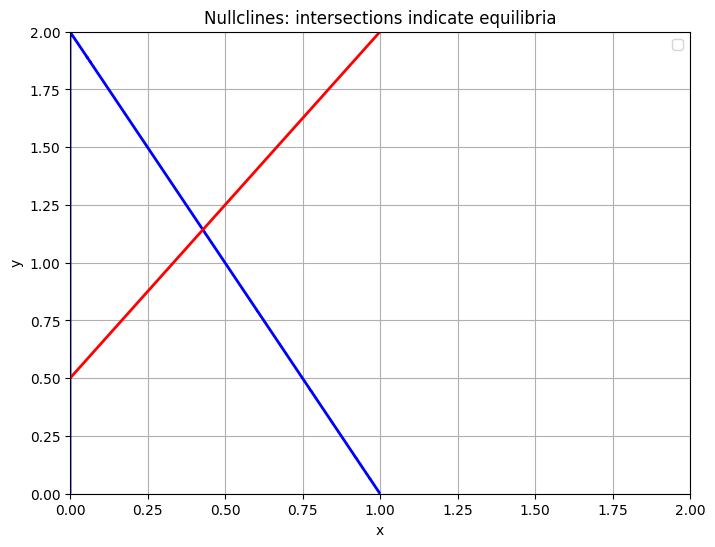

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b = 0.5
c = 0.1
a = 0.3
decay_y = 0.2

# Create grid
x_vals = np.linspace(0, 2, 400)
y_vals = np.linspace(0, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute derivatives
dx = X * (1 - X) - b * X * Y
dy = c + a * X - decay_y * Y

# Nullclines
nullcline_x = dx  # where dx=0
nullcline_y = dy  # where dy=0

plt.figure(figsize=(8, 6))
# Plot dx=0 nullcline contour
contour_dx = plt.contour(X, Y, nullcline_x, levels=[0], colors='blue', linewidths=2, label='dx=0 nullcline')
# Plot dy=0 nullcline contour
contour_dy = plt.contour(X, Y, nullcline_y, levels=[0], colors='red', linewidths=2, label='dy=0 nullcline')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Nullclines: intersections indicate equilibria')
plt.legend(['dx=0 nullcline', 'dy=0 nullcline'])
plt.grid(True)
plt.show()

Equilibrium populations: x* = 0.200, y* = 8.500


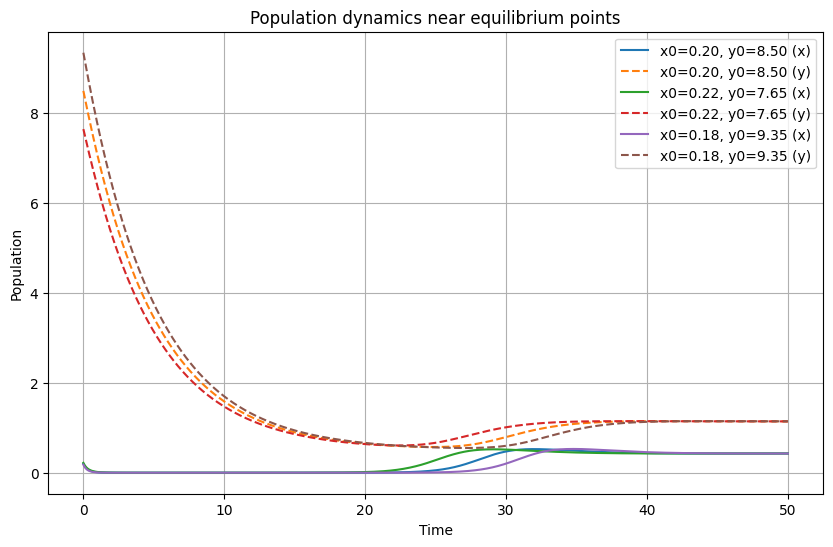

In [7]:
x_star = (1 - b) / (1 + (b * a) / c)
y_star = 1 + (a / c) * (1 + (b * a) / c)

print(f"Equilibrium populations: x* = {x_star:.3f}, y* = {y_star:.3f}")

# Now simulate around equilibrium to test stability:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def system(t, z):
    x, y = z
    dxdt = x*(1 - x) - b*x*y
    dydt = c + a*x - decay_y*y
    return [dxdt, dydt]

t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Start slightly off equilibrium to test behavior
initial_conditions = [
    (x_star, y_star),
    (x_star * 1.1, y_star * 0.9),
    (x_star * 0.9, y_star * 1.1)
]

plt.figure(figsize=(10, 6))
for x0, y0 in initial_conditions:
    sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label=f'x0={x0:.2f}, y0={y0:.2f} (x)')
    plt.plot(sol.t, sol.y[1], '--', label=f'x0={x0:.2f}, y0={y0:.2f} (y)')

plt.title('Population dynamics near equilibrium points')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import numpy as np

# Parameters (example values, replace with yours)
b = 0.5
a = 0.3
c = 0.1
decay_y = c  # Use the same c from system

# Compute equilibrium points (from your formula)
x_star = (1 - b) / (1 + (b * a) / c)
y_star = 1 + (a / c) * (1 + (b * a) / c)

# Jacobian function
def jacobian(x, y):
    df_dx = 1 - 2*x - b*y
    df_dy = -b*x
    dg_dx = a
    dg_dy = -c
    return np.array([[df_dx, df_dy],
                     [dg_dx, dg_dy]])

# Calculate Jacobian at equilibrium
J = jacobian(x_star, y_star)

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(J)

print(f"Jacobian at equilibrium (x*={x_star:.3f}, y*={y_star:.3f}):")
print(J)
print("Eigenvalues:", eigenvalues)

Jacobian at equilibrium (x*=0.200, y*=8.500):
[[-3.65 -0.1 ]
 [ 0.3  -0.1 ]]
Eigenvalues: [-3.64152908 -0.10847092]


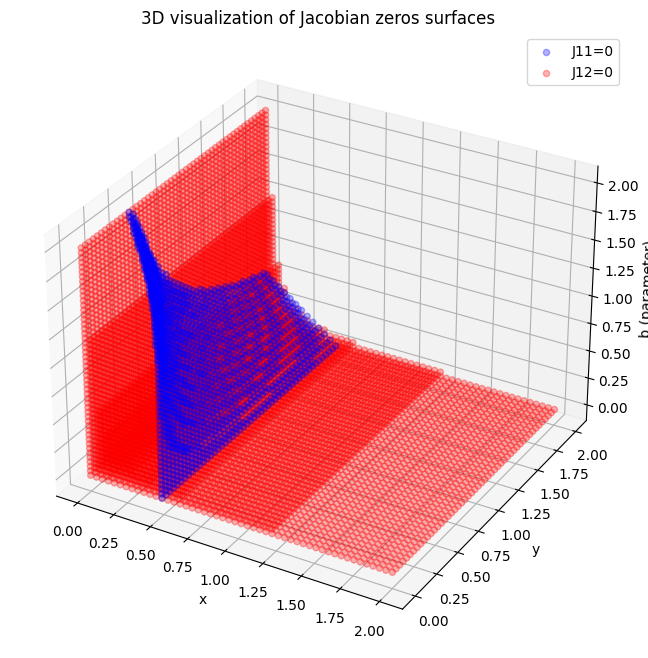

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fixed parameters
a = 0.3
c = 0.1

# Define ranges for x, y, b
x_vals = np.linspace(0, 2, 50)
y_vals = np.linspace(0, 2, 50)
b_vals = np.linspace(0, 2, 50)

X, Y, B = np.meshgrid(x_vals, y_vals, b_vals, indexing='ij')

# Jacobian entries as functions
J11 = 1 - 2*X - B*Y
J12 = -B * X
J21 = a  # constant, no surface needed
J22 = -c # constant, no surface needed

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot J11 = 0 surface
# Find points where J11 ~ 0 (small threshold)
threshold = 0.05
idx_j11 = np.abs(J11) < threshold
ax.scatter(X[idx_j11], Y[idx_j11], B[idx_j11], color='blue', alpha=0.3, label='J11=0')

# Plot J12 = 0 surface
idx_j12 = np.abs(J12) < threshold
ax.scatter(X[idx_j12], Y[idx_j12], B[idx_j12], color='red', alpha=0.3, label='J12=0')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('b (parameter)')
ax.set_title('3D visualization of Jacobian zeros surfaces')
ax.legend()

plt.show()

FloatSlider(value=0.1, description='b parameter:', max=2.0, step=0.01)

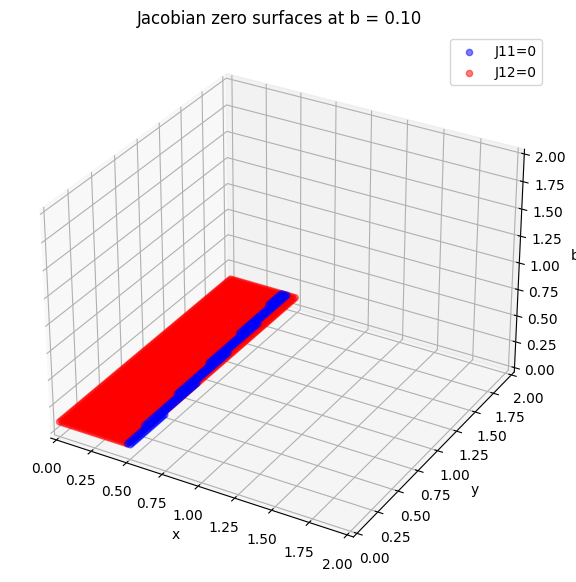

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, clear_output

# Fixed parameters
a = 0.3
c = 0.1

# Ranges for x and y
x_vals = np.linspace(0, 2, 100)
y_vals = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)

def plot_jacobian_zeros(b):
    J11 = 1 - 2*X - b*Y
    J12 = -b * X

    threshold = 0.05

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot points where J11 = 0 (approximately)
    idx_j11 = np.abs(J11) < threshold
    ax.scatter(X[idx_j11], Y[idx_j11], b*np.ones_like(X[idx_j11]), color='blue', alpha=0.5, label='J11=0')

    # Plot points where J12 = 0 (approximately)
    idx_j12 = np.abs(J12) < threshold
    ax.scatter(X[idx_j12], Y[idx_j12], b*np.ones_like(X[idx_j12]), color='red', alpha=0.5, label='J12=0')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('b')
    ax.set_title(f'Jacobian zero surfaces at b = {b:.2f}')
    ax.legend()
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_zlim(0, 2)
    plt.show()

b_slider = widgets.FloatSlider(value=0.5, min=0, max=2, step=0.01, description='b parameter:')

def on_value_change(change):
    clear_output(wait=True)
    display(b_slider)
    plot_jacobian_zeros(change['new'])

b_slider.observe(on_value_change, names='value')

display(b_slider)
plot_jacobian_zeros(b_slider.value)

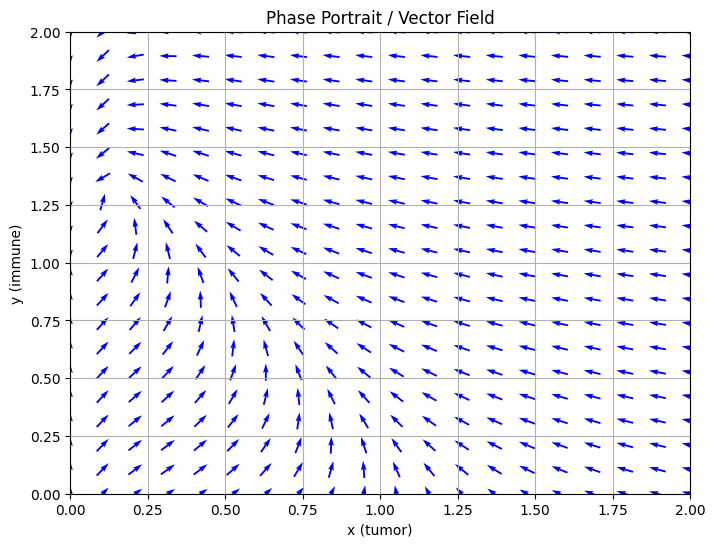

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.3
b = 0.7
c = 0.1

# Grid
x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)
X, Y = np.meshgrid(x, y)

# Vector field
U = X * (1 - X) - b * X * Y   # dx/dt
V = c + a * X - c * Y         # dy/dt

# Normalize the arrows (optional for better visuals)
N = np.sqrt(U**2 + V**2)
U_norm = U / N
V_norm = V / N

# Plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U_norm, V_norm, angles='xy', pivot='mid', color='blue')
plt.xlabel("x (tumor)")
plt.ylabel("y (immune)")
plt.title("Phase Portrait / Vector Field")
plt.grid(True)
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.show()

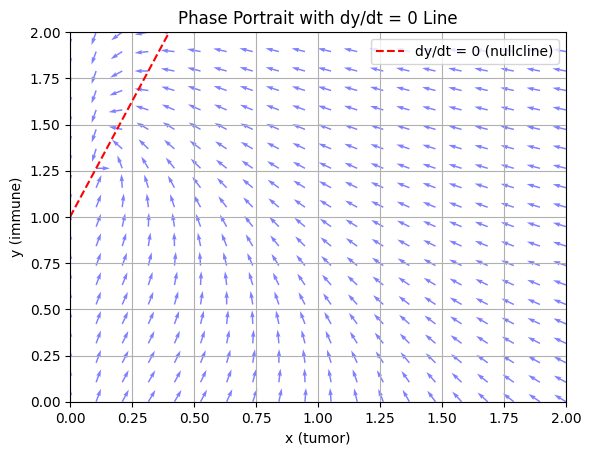

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.5
b = 0.7
c = 0.2

# Line: cy = c + ax => y = (c + a*x)/c
x_line = np.linspace(0, 2, 200)
y_line = (c + a * x_line) / c

plt.plot(x_line, y_line, 'r--', label='dy/dt = 0 (nullcline)')

# Optional: Add vector field
x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)
X, Y = np.meshgrid(x, y)

U = X * (1 - X) - b * X * Y
V = c + a * X - c * Y
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

plt.quiver(X, Y, U, V, color='blue', alpha=0.5)
plt.xlabel("x (tumor)")
plt.ylabel("y (immune)")
plt.title("Phase Portrait with dy/dt = 0 Line")
plt.legend()
plt.grid(True)
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.show()

In [5]:
import sympy as sp

# Declare symbols
a, b, c = sp.symbols('a b c')

# Expressions
x = c**2 - b*c - c**2/a
y = (a*c)/(a*b + c)

A = 1 - 2*c**2 + 2*b*c + 2*c**2/a - (a*b*c)/(a*b + c)
B = b*c**2*(1 - a)/a + b**2*c
C = a
D = -c

# Trace and determinant
trace = A + D
det = A*D - B*C

# Characteristic polynomial and eigenvalues
lambda1, lambda2 = sp.symbols('lambda1 lambda2')
char_poly = sp.simplify(sp.expand(sp.Lambda(lambda1, lambda1**2 - trace*lambda1 + det)(lambda1)))
eigenvalues = sp.solve(char_poly, lambda1)

print("Eigenvalues:")
for ev in eigenvalues:
    print(sp.simplify(ev))

Eigenvalues:
(a**2*b**2*c - a**2*b*c**2 - a**2*b*c + a**2*b/2 + 2*a*b*c**2 - a*c**3 - a*c**2/2 + a*c/2 + c**3 - sqrt(4*a**5*b**4*c - 4*a**5*b**3*c**2 + 4*a**4*b**4*c**2 - 8*a**4*b**3*c**3 + 12*a**4*b**3*c**2 + 4*a**4*b**3*c + 4*a**4*b**2*c**4 - 8*a**4*b**2*c**3 - 4*a**4*b**2*c**2 + a**4*b**2 + 16*a**3*b**3*c**3 - 24*a**3*b**2*c**4 + 16*a**3*b**2*c**3 + 12*a**3*b**2*c**2 + 8*a**3*b*c**5 - 8*a**3*b*c**4 - 8*a**3*b*c**3 + 2*a**3*b*c**2 + 2*a**3*b*c + 24*a**2*b**2*c**4 - 24*a**2*b*c**5 + 12*a**2*b*c**4 + 12*a**2*b*c**3 + 4*a**2*c**6 - 4*a**2*c**5 - 3*a**2*c**4 + 2*a**2*c**3 + a**2*c**2 + 16*a*b*c**5 - 8*a*c**6 + 4*a*c**5 + 4*a*c**4 + 4*c**6)/2)/(a*(a*b + c))
(a**2*b**2*c - a**2*b*c**2 - a**2*b*c + a**2*b/2 + 2*a*b*c**2 - a*c**3 - a*c**2/2 + a*c/2 + c**3 + sqrt(4*a**5*b**4*c - 4*a**5*b**3*c**2 + 4*a**4*b**4*c**2 - 8*a**4*b**3*c**3 + 12*a**4*b**3*c**2 + 4*a**4*b**3*c + 4*a**4*b**2*c**4 - 8*a**4*b**2*c**3 - 4*a**4*b**2*c**2 + a**4*b**2 + 16*a**3*b**3*c**3 - 24*a**3*b**2*c**4 + 16*a**3*b**2*c*